In [1]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#importing data
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"

html_content = pd.read_html(url)
#using first table found in the df
df = html_content[0]
#rename first column
df.rename(columns={df.columns[0]: "Modell"}, inplace=True)
#move modell to index
df.set_index("Modell", inplace=True)

Oppgaven er den følgende:
1) Skrap nettsiden og lagre resultatet en i dataramme.
Hint: argumentet «on_bad_lines='skip'» kan være nyttig når du skal laste opp csv-
filen.
2) Vask dataen til en tabell med bare relevante tall og gode overskrifter. Her er det mange
veier til Rom, men en måte å gå fram på kan være den følgende:
- Del kolonnen med WLTP-tall i to: en for kjørte km og en for energibruk.
Hint: metodene «str.split()» og «drop()» kan være nyttige her.
- Fjern benevninger i alle kolonnene med relevante tall.
Hint: kommandoen «str.replace» kan være nyttig her.
- Noen rader i datarammen inneholder ikke gyldige verdier (Polestar og Hyundai),
og bør fjernes. Det kan gjøres med å sørge for at alle tallene faktisk er positive av
typen «float».
3) Lag en regresjonsmodell av typen 𝑓(𝑥) = 𝑎𝑥 + 𝑏 der WLTP-km er uavhengig
variabel, og plott modellen mot leverandørens påståtte kjørelengde. Resultatet skal bli
som i figuren under, men din kode skal inkludere origo i plottet.


In [2]:
#seperate the second column km and kWh
df[['wltp_km','wltp_kWh']] = df['WLTP-tall'].str.split('/',expand=True)
df = df.drop(columns=['WLTP-tall'])
#remove km from the wltp_stopp
df['stopp'] = df['STOPP'].str.replace('km','')
df = df.drop(columns=['STOPP'])
#remove km from wltp_range
df['wltp'] = df['wltp_km'].str.replace('km','')
df = df.drop(columns=['wltp_km'])
#cleaning so we only have range and stopp
df = df.drop(['Avvik', 'wltp_kWh'], axis=1)

In [4]:
#removing rows that doesn't contain numbers
df = df[df['stopp'].str.contains('[0-9]')]
#change values into floats
df = df.astype(float)

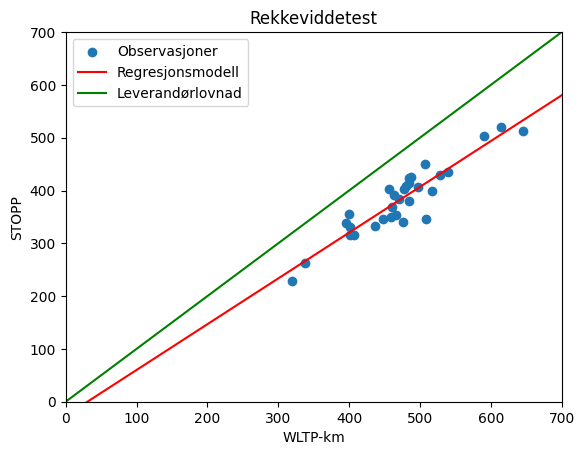

In [5]:
x = np.linspace(0, 700, 100)

#plotting the data
fig, ax = plt.subplots()
ax.scatter(df['wltp'], df['stopp'], label='Observasjoner') #scatterplot
#making linear regression line with wltp_km on x and stopp on y
a, b = np.polyfit(df['wltp'], df['stopp'], 1)

#plotting the lines
plt.xlim([0, 700]) #x axis lim from origo
plt.ylim([0, 700]) #y axis lim from origo
ax.plot(x, a*x+b, color = 'red', label='Regresjonsmodell') #reg plot
ax.plot(x, x, color='green', label='Leverandørlovnad') # producents promise

#adding labels
ax.set_xlabel('WLTP-km')
ax.set_ylabel('STOPP')
ax.set_title('Rekkeviddetest')
#adding legend
ax.legend();